In [1]:
# replicate previous study that visualized the cell type information for mibi toff data
import os
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter


In [2]:
def count_celltypes(cell_data,cell_type_col='pred'):
    value_array = cell_data[cell_type_col].to_numpy()
    print(value_array)

    count_dict = Counter(value_array)

    count_dict = dict(sorted(count_dict.items(), key=lambda item: item[1], reverse=True))

    for string, count in count_dict.items():
        
        print(f'{string}: {count}')
    return count_dict

    total_count = sum(count_dict.values())


In [3]:
def count_celltypes_by_group(data, group_column='Group'):
    unique_groups = data[group_column].unique()
    result = {}
    for group in unique_groups:
        group_data = data[data[group_column] == group]
        count_dict = count_celltypes(group_data)
        total_count = sum(count_dict.values())
        percentage_dict = {k: round(v / total_count * 100, 2)for k, v in count_dict.items()}
        result[group] = {'counts': count_dict, 'percentage': percentage_dict}
    return result

In [4]:
#load data
path_cell_summary=r"D:\MIBI-TOFF\Data_For_Amos\cleaned_expression_with_both_classification_prob_spatial_27_09_23.csv"
cell_sum=pd.read_csv(path_cell_summary)
#remove columns that are not the proteins that we want as well as the numerical index of cell numbers
columns_drop=[0]+list(range(2,28))
filt_cell_sum=cell_sum.drop(columns=cell_sum.columns[columns_drop],axis=1)
print(cell_sum.head())

   Unnamed: 0  cell_size     128Te     129Xe  12C     130Xe     131Xe  \
0           0       22.0  4.772296  5.298342  0.0  4.846394  5.040530   
1           1       64.0  5.875641  5.910126  0.0  4.636036  5.830791   
2           2       75.0  5.399690  6.469769  0.0  5.041314  6.284138   
3           3       59.0  5.930317  5.874748  0.0  4.265500  5.511256   
4           4      135.0  5.957570  5.918503  0.0  4.325043  5.804698   

      132Xe     137Ba     138Ba  ...  centroid_dif  num_concavities   fov  \
0  5.465389  2.219161  2.903433  ...      0.000000              0.0  FOV2   
1  6.095266  3.337921  3.337921  ...      0.010626              0.0  FOV2   
2  6.423250  3.179785  3.814529  ...      0.005771              0.0  FOV2   
3  5.999910  3.014948  2.612470  ...      0.015455              0.0  FOV2   
4  6.006177  2.479528  3.389912  ...      0.009059              0.0  FOV2   

            pred  pred_prob         class  score        spatial  Group  \
0    DC sign Mac   0.559

In [5]:
filt_cell_sum['pred'] = filt_cell_sum['pred'].astype(str)
all_column_dtypes = filt_cell_sum['pred'].dtypes
print("Data types of all columns:")
print(all_column_dtypes)
unique_values = filt_cell_sum['pred'].unique()
print(unique_values)

Data types of all columns:
object
['DC sign Mac' 'blood vessels' 'Unidentified' 'Collagen_sma' 'B cell'
 'CD4 APC' 'CD4 T cell' 'CD20_neg_B_cells' 'SMA' 'CD8 T cell' 'Mac'
 'Collagen' 'Memory_CD4_T_Cells' 'CD206_Mac' 'Neutrophil' 'NK cell'
 'Mono_CD14_DR' 'CD11_CD11c_DCsign_DCs' 'CD68_Mac' 'Hevs' 'CD4 Treg'
 'CD14_CD11c_DCs' 'DCs' 'Follicular_Germinal_B_Cell' 'Tfh' 'Immune'
 'tumor' 'CD3 only']


In [6]:
#drop unknown and blood vessels and those counted as just immune
#filt_cell_sum=filt_cell_sum[(filt_cell_sum['pred'] != 'Unidentified')].dropna()
#filt_cell_sum=filt_cell_sum[(filt_cell_sum['pred'] != 'blood vessels')].dropna()
filt_cell_sum=filt_cell_sum[(filt_cell_sum['pred'] != 'Unidentified')].dropna()
filt_cell_sum=filt_cell_sum.dropna()
print(filt_cell_sum.shape)



(1591012, 64)


In [7]:
#trying to get the sum of each cell type
from collections import Counter
value_array = filt_cell_sum['pred'].to_numpy()
print(value_array)

count_dict = Counter(value_array)

count_dict = dict(sorted(count_dict.items(), key=lambda item: item[1], reverse=True))

for string, count in count_dict.items():
    
    print(f'{string}: {count}')

total_count = sum(count_dict.values())
print(f'Total Count: {total_count}')
print(f'Tumor Cell ratio:',{count_dict['tumor']/total_count})

['DC sign Mac' 'blood vessels' 'Collagen_sma' ... 'tumor' 'tumor' 'tumor']
CD4 T cell: 491864
B cell: 319888
Memory_CD4_T_Cells: 163469
CD8 T cell: 156633
Follicular_Germinal_B_Cell: 94592
tumor: 40051
Hevs: 39939
CD20_neg_B_cells: 36075
DC sign Mac: 28117
blood vessels: 28080
CD4 APC: 25002
Mono_CD14_DR: 24441
Collagen_sma: 21914
CD206_Mac: 21727
CD4 Treg: 15799
SMA: 14757
Collagen: 13349
Neutrophil: 12308
Tfh: 12198
DCs: 9086
CD14_CD11c_DCs: 5995
NK cell: 5619
CD68_Mac: 4150
Mac: 3538
CD11_CD11c_DCsign_DCs: 1737
CD3 only: 666
Immune: 18
Total Count: 1591012
Tumor Cell ratio: {0.025173285933732744}


['DC sign Mac' 'blood vessels' 'Collagen_sma' ... 'tumor' 'tumor' 'tumor']
CD4 T cell: 491864
B cell: 319888
Memory_CD4_T_Cells: 163469
CD8 T cell: 156633
Follicular_Germinal_B_Cell: 94592
tumor: 40051
Hevs: 39939
CD20_neg_B_cells: 36075
DC sign Mac: 28117
blood vessels: 28080
CD4 APC: 25002
Mono_CD14_DR: 24441
Collagen_sma: 21914
CD206_Mac: 21727
CD4 Treg: 15799
SMA: 14757
Collagen: 13349
Neutrophil: 12308
Tfh: 12198
DCs: 9086
CD14_CD11c_DCs: 5995
NK cell: 5619
CD68_Mac: 4150
Mac: 3538
CD11_CD11c_DCsign_DCs: 1737
CD3 only: 666
Immune: 18
('CD4 T cell', 'B cell', 'Memory_CD4_T_Cells', 'CD8 T cell', 'Follicular_Germinal_B_Cell', 'tumor', 'Hevs', 'CD20_neg_B_cells', 'DC sign Mac', 'blood vessels', 'CD4 APC', 'Mono_CD14_DR', 'Collagen_sma', 'CD206_Mac', 'CD4 Treg', 'SMA', 'Collagen', 'Neutrophil', 'Tfh', 'DCs', 'CD14_CD11c_DCs', 'NK cell', 'CD68_Mac', 'Mac', 'CD11_CD11c_DCsign_DCs', 'CD3 only', 'Immune')
(491864, 319888, 163469, 156633, 94592, 40051, 39939, 36075, 28117, 28080, 25002, 244

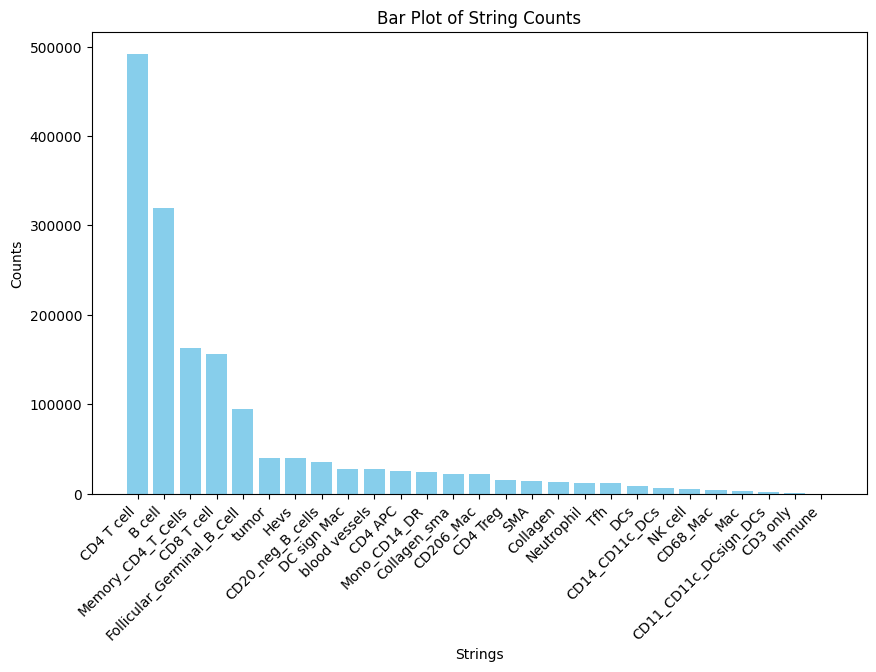

In [8]:
count_dict=count_celltypes(filt_cell_sum)
strings, counts = zip(*count_dict.items())
print(strings)
print(counts)

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(strings, counts, color='skyblue')
plt.xlabel('Strings')
plt.ylabel('Counts')
plt.title('Bar Plot of String Counts')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

In [9]:
#varify tumor count
#value_array = filt_cell_sum['class'].to_numpy()
#print(value_array)

#count_dict = Counter(value_array)

#count_dict = dict(sorted(count_dict.items(), key=lambda item: item[1], reverse=True))

##    print(f'{string}: {count}')

#total_count = sum(count_dict.values())
#print(f'Total Count: {total_count}')

#print(f'Tumor Cell ratio:',{count_dict['tumor']/total_count})


In [10]:
group_mapping = {
    'CD4 T cell': 'CD4_T_cell',
    'Memory_CD4_T_Cells': 'Memory_CD4_T_Cells',
    'CD8 T cell': 'CD8_T_cell',
    'CD4 APC': 'DCs',
    'CD4 Treg': 'CD4_Treg',
    'CD3 only': 'CD3',
    'B cell': 'B_Cells',
    'Follicular_Germinal_B_Cell': 'Germinal_Center_B_Cell',
    'CD20_neg_B_cells': 'B_Cells',
    'DC sign Mac': 'MAC',
    'CD206_Mac': 'MAC',
    'CD68_Mac': 'MAC',
    'Mac': 'MAC',
    'DCs': 'DCs',
    'CD14_CD11c_DCs': 'DCs',
    'CD11_CD11c_DCsign_DCs': 'DCs',
    'Mono_CD14_DR': 'MAC',
    'tumor': 'tumor','Tumor'
    'Hevs': 'Hevs',
    'Collagen_sma': 'Stroma',
    'SMA': 'Stroma',
    'Collagen': 'Stroma',
    'Neutrophil': 'Neutrophil',
    'Tfh': 'CD4_T_cell',
    'NK cell': 'NK cell',
    'blood vessels':'blood vessels'
}
filt_cell_sum['pred'] = filt_cell_sum['pred'].replace(group_mapping)


['MAC' 'blood vessels' 'Stroma' ... 'tumor' 'tumor' 'tumor']
CD4_T_cell: 504062
B_Cells: 355963
Memory_CD4_T_Cells: 163469
CD8_T_cell: 156633
Germinal_Center_B_Cell: 94592
MAC: 81973
Stroma: 50020
DCs: 41820
tumor: 40051
Hevs: 39939
blood vessels: 28080
CD4_Treg: 15799
Neutrophil: 12308
NK cell: 5619
CD3: 666
Immune: 18
('CD4_T_cell', 'B_Cells', 'Memory_CD4_T_Cells', 'CD8_T_cell', 'Germinal_Center_B_Cell', 'MAC', 'Stroma', 'DCs', 'tumor', 'Hevs', 'blood vessels', 'CD4_Treg', 'Neutrophil', 'NK cell', 'CD3', 'Immune')
(504062, 355963, 163469, 156633, 94592, 81973, 50020, 41820, 40051, 39939, 28080, 15799, 12308, 5619, 666, 18)


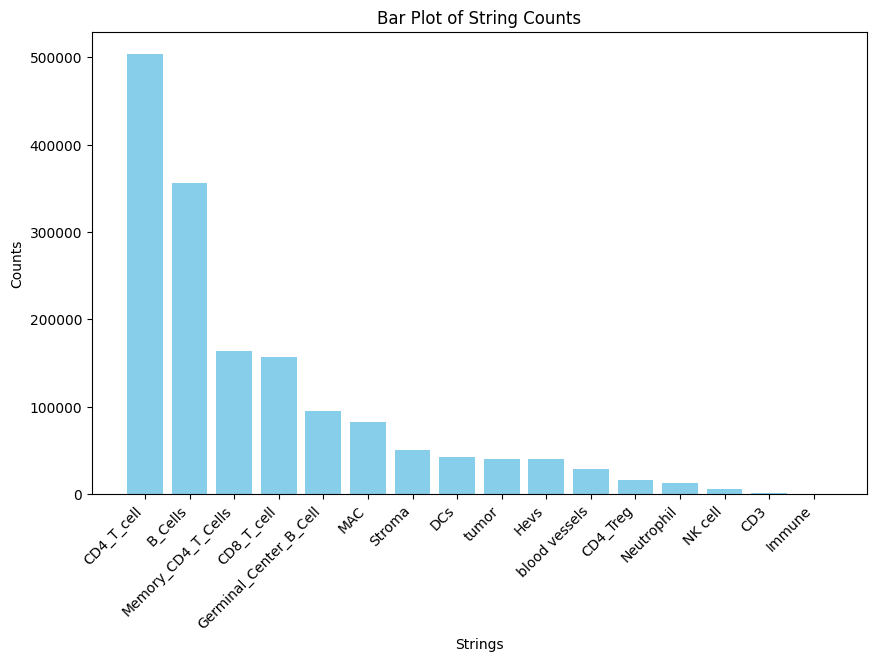

In [11]:
count_dict=count_celltypes(filt_cell_sum)
strings, counts = zip(*count_dict.items())
print(strings)
print(counts)

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(strings, counts, color='skyblue')
plt.xlabel('Strings')
plt.ylabel('Counts')
plt.title('Bar Plot of String Counts')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

In [20]:
def count_celltypes_by_patient(data, group_column='Group', patient_column='fov'):
    unique_groups = data[group_column].unique()
    result = {}
    for group in unique_groups:
        
        group_data = data[data[group_column] == group]
        unique_patients = group_data[patient_column].unique()
        avg_count_dict = {}
        avg_percentage_dict = {}
        for patient in unique_patients:
            
            patient_data = group_data[group_data[patient_column] == patient]
            count_dict = count_celltypes(patient_data)
            total_count = sum(count_dict.values())
            for k, v in count_dict.items():
                avg_count_dict[k] = avg_count_dict.get(k, 0) + v
                avg_percentage_dict[k] = avg_percentage_dict.get(k, 0) + (v / total_count * 100)
        num_patients = len(unique_patients)
        avg_count_dict = {k: v / num_patients for k, v in avg_count_dict.items()}
        avg_percentage_dict = {k: v / num_patients for k, v in avg_percentage_dict.items()}
        result[group] = {'avg_counts': avg_count_dict, 'avg_percentage': avg_percentage_dict}
    return result

In [13]:
count_dict_by_group = count_celltypes_by_group(filt_cell_sum, 'Group')
for group, counts in count_dict_by_group.items():
    print(f"Group: {group}")
    for string, count in counts.items():
        print(f'{string}: {count}')

output_file = 'counts_by_group.csv'
with open(output_file, 'w', newline='') as csvfile:
            writer = csv.writer(csvfile)
            writer.writerow(['Group', 'String', 'Count', 'Percentage'])
            for group, counts_info in count_dict_by_group.items():
                counts = counts_info['counts']
                percentages = counts_info['percentage']
                for string, count in counts.items():
                    percentage = percentages[string]
                    writer.writerow([group, string, count, percentage])

['MAC' 'blood vessels' 'Stroma' ... 'CD4_T_cell' 'CD4_T_cell' 'CD4_T_cell']
CD4_T_cell: 146394
B_Cells: 88581
Memory_CD4_T_Cells: 55317
CD8_T_cell: 48018
Germinal_Center_B_Cell: 31163
MAC: 15950
Stroma: 12479
DCs: 12311
Hevs: 11615
blood vessels: 6122
CD4_Treg: 5191
Neutrophil: 2343
NK cell: 1673
Immune: 3
['DCs' 'DCs' 'DCs' ... 'DCs' 'B_Cells' 'B_Cells']
CD4_T_cell: 133310
B_Cells: 86758
CD8_T_cell: 36551
Memory_CD4_T_Cells: 35135
MAC: 29579
Germinal_Center_B_Cell: 15220
Stroma: 12196
Hevs: 11313
DCs: 8431
blood vessels: 8271
Neutrophil: 2688
CD4_Treg: 2023
NK cell: 1294
tumor: 13
Immune: 4
['MAC' 'CD4_T_cell' 'DCs' ... 'tumor' 'tumor' 'tumor']
CD4_T_cell: 106653
B_Cells: 82103
CD8_T_cell: 38591
Memory_CD4_T_Cells: 35366
Germinal_Center_B_Cell: 24471
tumor: 21744
MAC: 14442
Stroma: 9511
DCs: 9505
Hevs: 8449
CD4_Treg: 5369
blood vessels: 5237
Neutrophil: 2833
NK cell: 1214
CD3: 586
Immune: 3
['CD4_T_cell' 'CD4_T_cell' 'DCs' ... 'CD4_T_cell' 'Memory_CD4_T_Cells'
 'CD4_T_cell']
CD4_T_cel

In [21]:
count_dict_by_patient = count_celltypes_by_patient(filt_cell_sum, 'Group','fov')
print(count_dict_by_patient)

G1
FOV2
['MAC' 'blood vessels' 'Stroma' ... 'B_Cells' 'B_Cells' 'CD8_T_cell']
MAC: 2313
B_Cells: 1898
CD4_T_cell: 1699
Stroma: 911
CD8_T_cell: 875
Memory_CD4_T_Cells: 570
blood vessels: 488
DCs: 130
NK cell: 118
Neutrophil: 54
Hevs: 40
CD4_Treg: 3
FOV4
['MAC' 'Stroma' 'Stroma' ... 'CD8_T_cell' 'Stroma' 'MAC']
B_Cells: 4384
CD4_T_cell: 2698
Germinal_Center_B_Cell: 1134
MAC: 967
CD8_T_cell: 602
Memory_CD4_T_Cells: 539
Stroma: 532
blood vessels: 233
Hevs: 192
DCs: 182
NK cell: 48
CD4_Treg: 38
Neutrophil: 19
FOV6
['CD4_T_cell' 'DCs' 'Memory_CD4_T_Cells' ... 'CD4_T_cell' 'CD4_T_cell'
 'CD4_T_cell']
CD4_T_cell: 9034
Memory_CD4_T_Cells: 2998
Hevs: 440
Germinal_Center_B_Cell: 410
CD8_T_cell: 352
B_Cells: 349
DCs: 323
MAC: 242
Stroma: 193
CD4_Treg: 102
NK cell: 43
blood vessels: 37
Neutrophil: 8
FOV8
['Memory_CD4_T_Cells' 'CD4_T_cell' 'CD4_T_cell' ... 'Memory_CD4_T_Cells'
 'CD4_T_cell' 'CD4_T_cell']
CD4_T_cell: 4250
B_Cells: 3902
Memory_CD4_T_Cells: 1428
MAC: 677
DCs: 668
Germinal_Center_B_Cell

In [22]:
output_file = 'average_counts_and_percentages_by_group.csv'
with open(output_file, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Group', 'String', 'Average Count', 'Average Percentage'])
    for group, counts_info in count_dict_by_group.items():
        avg_counts = counts_info['avg_counts']
        avg_percentages = counts_info['avg_percentage']
        for string, count in avg_counts.items():
            percentage = avg_percentages[string]
            writer.writerow([group, string, count, percentage])

In [ ]:

#Split across all dat versions
X = filt_cell_sum.drop('pred', axis=1)  # Features
y = filt_cell_sum[['pred']]  # Labels
print(X.head())
X_columns_drop = list(range(40, X.shape[1]))#These numbers are determined from the spread sheet after removing everything we wont use
X.drop(columns=X.columns[X_columns_drop], axis=1, inplace=True)
print(X.head())
print(y.head())


   cell_size  Alexa Fluor 488  Bax  CCR7  CD11c  CD14  CD163      CD20  CD206  \
0       22.0              0.0  0.0   0.0    0.0   0.0    0.0  0.000000    0.0   
1       64.0              0.0  0.0   0.0    0.0   0.0    0.0  0.000000    0.0   
3       59.0              0.0  0.0   0.0    0.0   0.0    0.0  0.000000    0.0   
4      135.0              0.0  0.0   0.0    0.0   0.0    0.0  3.689504    0.0   
5      139.0              0.0  0.0   0.0    0.0   0.0    0.0  0.000000    0.0   

   CD21  ...  convex_hull_resid  centroid_dif  num_concavities   fov  \
0   0.0  ...           0.000000      0.000000              0.0  FOV2   
1   0.0  ...           0.015385      0.010626              0.0  FOV2   
3   0.0  ...           0.032787      0.015455              0.0  FOV2   
4   0.0  ...           0.028777      0.009059              0.0  FOV2   
5   0.0  ...           0.034722      0.007883              0.0  FOV2   

   pred_prob   class  score        spatial  Group  patient number  
0   0.559885

Text(0.5, 0.92, '3D Scatter Plot with PCA')

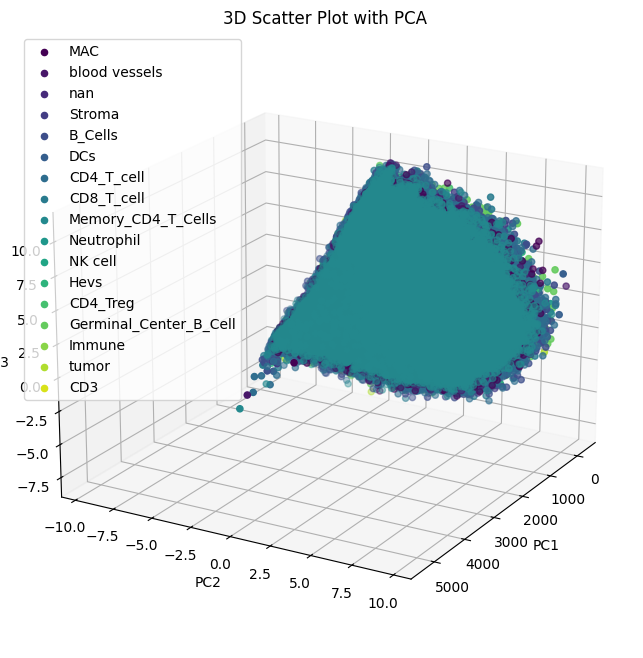

In [ ]:
#Simple PCA analysis clearly to many variables and cell types to get a meaningful results. 
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)


df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])
df_pca['pred'] = y

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

cmap = plt.get_cmap('viridis') 

unique_categories = df_pca['pred'].unique()
colors = [cmap(i / len(unique_categories)) for i in range(len(unique_categories))]

for category, color in zip(unique_categories, colors):
    indices = df_pca['pred'] == category
    ax.scatter(
        df_pca.loc[indices, 'PC1'],
        df_pca.loc[indices, 'PC2'],
        df_pca.loc[indices, 'PC3'],
        c=[color],
        label=category
    )

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.legend()
ax.view_init(elev=20, azim=30)

plt.title('3D Scatter Plot with PCA')
#plt.show()

###################################################

In [ ]:
pd.set_option('display.max_columns', None)
filt_expression_sum= filt_cell_sum.drop('pred', axis=1)  # Features
cell_type = filt_cell_sum.loc[:,['fov','pred','Group','patient number']]  # Labels

columns_drop = list(range(40, filt_expression_sum.shape[1]))#These numbers are determined from the spread sheet after removing everything we wont use
filt_expression_sum.drop(columns=filt_expression_sum.columns[columns_drop], axis=1, inplace=True)
cell_processed= pd.merge(filt_expression_sum, cell_type, left_index=True, right_index=True, how='inner')
print(cell_processed.head(5))

   cell_size  Alexa Fluor 488  Bax  CCR7  CD11c  CD14  CD163      CD20  CD206  \
0       22.0              0.0  0.0   0.0    0.0   0.0    0.0  0.000000    0.0   
1       64.0              0.0  0.0   0.0    0.0   0.0    0.0  0.000000    0.0   
3       59.0              0.0  0.0   0.0    0.0   0.0    0.0  0.000000    0.0   
4      135.0              0.0  0.0   0.0    0.0   0.0    0.0  3.689504    0.0   
5      139.0              0.0  0.0   0.0    0.0   0.0    0.0  0.000000    0.0   

   CD21  CD3      CD31  CD4      CD45    CD45RA  CD45RO  CD56  CD68  CD69  \
0   0.0  0.0  5.203037  0.0  0.000000  0.000000     0.0   0.0   0.0   0.0   
1   0.0  0.0  1.228939  0.0  0.000000  0.000000     0.0   0.0   0.0   0.0   
3   0.0  0.0  0.000000  0.0  0.000000  0.000000     0.0   0.0   0.0   0.0   
4   0.0  0.0  0.000000  0.0  3.794746  0.685723     0.0   0.0   0.0   0.0   
5   0.0  0.0  0.000000  0.0  4.276060  0.000000     0.0   0.0   0.0   0.0   

        CD8    COL1A1   DC-SIGN  Foxp3  Granzyme B

In [ ]:
result_df_list = []

meta_columns = ['fov', 'Group', 'patient number', 'pred']

result_df_list.append(cell_processed[meta_columns])

for column in cell_processed.columns.difference(['fov', 'Group', 'patient number', 'pred']):
    # Group by all relevant columns and compute mean, std, and sum

    stats_df = cell_processed.groupby(['fov', 'Group', 'patient number','pred'])[column].agg(['mean', 'std', 'sum']).reset_index()
    print(stats_df)
    #stats_df.drop(columns=['fov', 'Group', 'patient number','pred'],inplace=True)
    stats_df.columns = ['fov', 'Group', 'patient number','pred',f'{column}_mean', f'{column}_std', f'{column}_sum']

    

    result_df_list.append(stats_df)


# Concatenate the individual DataFrames into a single result DataFrame
result_df = pd.concat(result_df_list, axis=1)
print(result_df.head())
print(result_df.shape)
result_df.to_csv('test_result.csv')


        fov Group  patient number           pred      mean       std  \
0     FOV10    G1               3        B_Cells  0.029561  0.289659   
1     FOV10    G1               3     CD4_T_cell  0.025261  0.268535   
2     FOV10    G1               3       CD4_Treg  0.104359  0.470221   
3     FOV10    G1               3     CD8_T_cell  0.058477  0.429561   
4     FOV10    G1               3            DCs  0.000000  0.000000   
...     ...   ...             ...            ...       ...       ...   
2405  FOV98    G4             104        NK cell  0.000000  0.000000   
2406  FOV98    G4             104     Neutrophil  0.000000  0.000000   
2407  FOV98    G4             104         Stroma  0.014945  0.133672   
2408  FOV98    G4             104  blood vessels  0.000000  0.000000   
2409  FOV98    G4             104          tumor  0.053735  0.354657   

            sum  
0     61.605983  
1     80.961327  
2      9.287983  
3     68.886320  
4      0.000000  
...         ...  
2405   0.